<a href="https://colab.research.google.com/github/SahanUday/EN3150-Pattern-Recognition/blob/main/ML/outlier_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd

In [39]:
data=pd.read_csv('insurance.csv')

In [40]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


outlier detection of "charger"

In [41]:
data.shape

(1338, 7)

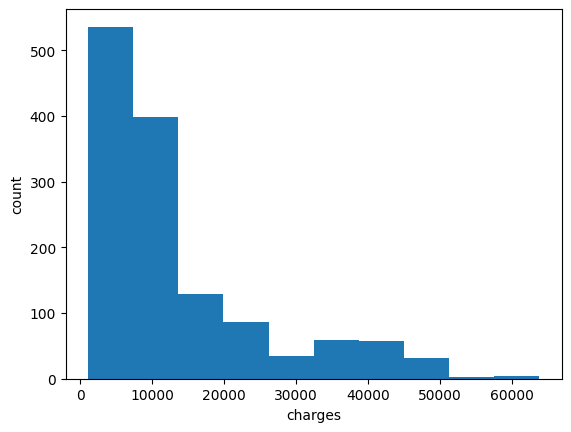

In [42]:
plt.hist(data['charges'])
plt.xlabel('charges')
plt.ylabel('count')
plt.show()

In [43]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# using z-score

In [44]:
mean=numpy.mean(data['charges'])
std=numpy.std(data['charges'])
print(mean,std)

13270.422265141257 12105.484975561605


In [45]:
(data["charges"]-mean)/std

,charges
0,0.298584
1,-0.953689
2,-0.728675
3,0.719843
4,-0.776802
...,...
1333,-0.220551
1334,-0.914002
1335,-0.961596
1336,-0.930362


In [46]:
data['charges_zscore']=(data['charges']-mean)/std

In [47]:
data.head()

,age,sex,bmi,children,smoker,region,charges,charges_zscore
0,19,female,27.900,0,yes,southwest,16884.92400,0.298584
1,18,male,33.770,1,no,southeast,1725.55230,-0.953689
2,28,male,33.000,3,no,southeast,4449.46200,-0.728675
3,33,male,22.705,0,no,northwest,21984.47061,0.719843
4,32,male,28.880,0,no,northwest,3866.85520,-0.776802


In [48]:
print(data["charges_zscore"].min())
print(data["charges_zscore"].max())

-1.0035573452584996
4.1716631631700425


In [49]:
data[data["charges_zscore"]>3]

,age,sex,bmi,children,smoker,region,charges,charges_zscore
34,28,male,36.400,1,yes,southwest,51194.55914,3.132806
543,54,female,47.410,0,yes,southeast,63770.42801,4.171663
577,31,female,38.095,1,yes,northeast,58571.07448,3.742159
819,33,female,35.530,0,yes,northwest,55135.40209,3.458348
1146,60,male,32.800,0,yes,southwest,52590.82939,3.248148
1230,52,male,34.485,3,yes,northwest,60021.39897,3.861966
1300,45,male,30.360,0,yes,southeast,62592.87309,4.074389


In [50]:
data[data["charges_zscore"]<-3]

,age,sex,bmi,children,smoker,region,charges,charges_zscore


In [51]:
outlier_indexes=[]
outlier_indexes.extend(data.index[data["charges_zscore"]>3].tolist())
outlier_indexes.extend(data.index[data["charges_zscore"]<-3].tolist())
outlier_indexes

[34, 543, 577, 819, 1146, 1230, 1300]

In [52]:
new_data=data.drop(data.index[outlier_indexes])

In [53]:
print(new_data.shape)
print(data.shape)

(1331, 8)
(1338, 8)


In [54]:
new_data=new_data.drop("charges_zscore",axis=1)
new_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


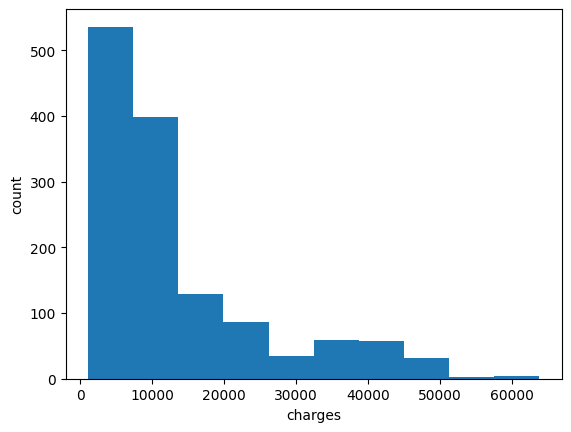

In [56]:
plt.hist(data['charges'])
plt.xlabel('charges')
plt.ylabel('count')
plt.show()

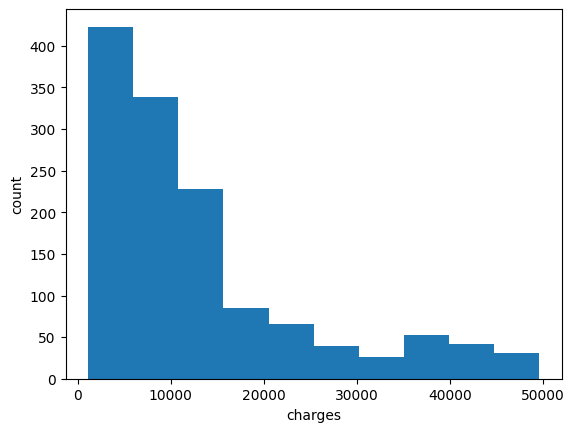

In [55]:
plt.hist(new_data['charges'])
plt.xlabel('charges')
plt.ylabel('count')
plt.show()